# Preprocessing
we create silence files, pad short files and make training and validation sets

In [1]:
import numpy as np
import librosa
import librosa.display
import os
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import random

## classes
인식하길 원하는 데이터의 종류 / 그 외의 단어는 unknown이다.

In [2]:
train_dir = './data/train/audio/' #download files from kaggle

classes = ['yes', 'no', 
           'up', 'down', 
           'left', 'right', 
           'on', 'off', 
           'stop', 'go', 
           'backward', 'forward',
           'house',
           'silence', 'unknown']

run this cell to move the background noises folder out of the audio directory. We will create silence samples from these files after.

In [3]:
%%bash
ls data/train

0a2b400e_nohash_4.wav
0ac15fe9_nohash_0.wav
LICENSE
README.md
_background_noise_
audio
command.wav
testing_list.txt
validation_list.rtf
validation_list.txt


Split all the audio files from _background_noise_ folder in 1-sec chunks

In [4]:
def split_arr(arr):
    """
    split an array into chunks of length 16000
    Returns:
        list of arrays
    """
    return np.split(arr, np.arange(16000, len(arr), 16000))

## create_silence
백그라운드 노이스 파일을 읽는다. sampling rate를 16000으로 한다. librosa.load의 결과로 sig는 array,  rate = 16000이다. 그리고 silence가 없다면 silence 파일을 생성한다. wav file 생성. 

In [5]:
def create_silence():
    """
    reads wav files in background noises folder, 
    splits them and saves to silence folder in train_dir
    """
    for file in os.listdir('data/train/_background_noise_/'):
        if 'wav' in file:
            sig, rate = librosa.load('data/train/_background_noise_/' + file, sr = 16000)        
            sig_arr = split_arr(sig)
            if not os.path.exists(train_dir+'silence/'):
                os.makedirs(train_dir+'silence/')
            for ind, arr in enumerate(sig_arr):
                filename = 'frag%d' %ind + '_%s' %file # example: frag0_running_tap.wav
                librosa.output.write_wav(train_dir+'silence/'+filename, arr, 16000)

In [6]:
create_silence()

It is probably a good idea to make more silence samples yourself. Perhaps just by recording walking or driving around without speaking. the silence class is underrepresented.

three lists with file names. one for traning set, one for validation set, one for all. Plus a directory with file counts per class.

all_classes에 모든 단어 리스트 생성

In [3]:
folders = os.listdir(train_dir)
# put folders in same order as in the classes list, used when making sets
all_classes = [x for x in classes[:14]]
for ind, cl in enumerate(folders):
    if cl not in classes:
        all_classes.append(cl)
print(all_classes)

['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'backward', 'forward', 'house', 'silence', 'eight', 'cat', 'tree', 'learn', 'bed', 'happy', '.DS_Store', 'dog', 'wow', 'follow', 'nine', 'three', 'sheila', 'one', 'bird', 'zero', 'seven', 'visual', 'marvin', 'two', 'six', 'five', 'four']


In [14]:
len(all_classes)

36

In [4]:
all_classes

['yes',
 'no',
 'up',
 'down',
 'left',
 'right',
 'on',
 'off',
 'stop',
 'go',
 'backward',
 'forward',
 'house',
 'silence',
 'eight',
 'cat',
 'tree',
 'learn',
 'bed',
 'happy',
 '.DS_Store',
 'dog',
 'wow',
 'follow',
 'nine',
 'three',
 'sheila',
 'one',
 'bird',
 'zero',
 'seven',
 'visual',
 'marvin',
 'two',
 'six',
 'five',
 'four']

validation list를 만든다. testing list

In [15]:
with open('./data/train/validation_list.txt') as val_list:
    validation_list = [row[0] for row in csv.reader(val_list)]
    print(len(validation_list))
# assert len(validation_list) == 9981, 'file not loaded'

42462


validation list에 silence files을 추가한다. 

In [16]:
word_list  = []
train_dir = './data/train/'

In [17]:
for i, file in enumerate(os.listdir(train_dir + 'audio')):
    word_list.append(file)

In [24]:
len(word_list)

36

In [25]:
validation_list = []
test_list = []
train_dir = './data/train/'
num = 0

In [26]:
for word in word_list:
    for i, file in enumerate(os.listdir(train_dir + 'audio/' + word + '/')):
        pass
    end = int(i*0.25)
    end2 = end + int(i*0.3)
    num += i
    for i, file in enumerate(os.listdir(train_dir + 'audio/' + word + '/')):
        if(i < end):
            validation_list.append(word + '/' + file)
        elif(end <= i < end2):
            test_list.append(word + '/' + file)

In [66]:
for i in training_list:
    for j in test_list:
        if(i == j):
            print('i = ', i)
            print('j = ', j)

In [28]:
len(validation_list) , len(test_list), num

(26533, 31841, 106195)

In [29]:
with open('validation_list.txt', 'w') as f:
    for item in validation_list:
        f.write("%s\n" % item)

In [31]:
with open('test_list.txt', 'w') as f:
    for item in test_list:
        f.write("%s\n" % item)

In [82]:
# #add silence files to validation_list
# for i, file in enumerate(os.listdir(train_dir + 'silence/')):
#     if i%10==0:
#         validation_list.append('silence/'+file)

training_list = []
all_files_list = []
class_counts = {}

# validation list를 통해서 trainig test를 만든다. 
for folder in folders:
    try:
        files = os.listdir(train_dir + folder)
        for i, f in enumerate(files):
            all_files_list.append(folder + '/' + f)
            path = folder + '/' + f
            if path not in validation_list:
                if path not in test_list:
                    training_list.append(folder + '/' + f)        
            class_counts[folder] = i
    except NotADirectoryError:
        print(folder)
    except FileNotFoundError:
        print(folder)

#remove filenames from validation_list that don't exist anymore (due to eda)
validation_list = list(set(validation_list).intersection(all_files_list))

command(2).wav
.DS_Store
command.wav
command(1).wav


In [83]:
assert len(validation_list) + len(training_list)+ len(test_list) == len(all_files_list), 'error'

In [84]:
print(training_list[345], 'size training set: ',len(training_list), 'size validation set: ', len(validation_list))

right/a05a90c1_nohash_4.wav size training set:  47960 size validation set:  26533


In [41]:
print(len(class_counts))
# 각 class 안에 몇 개의 데이터가 있는지 확인

36


plot a wav file

min:  -0.56863403 
max:  0.21139526 
mean:  0.00011529732 
median:  6.1035156e-05 
variance:  0.002271343 
length:  16000


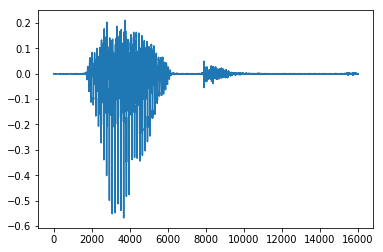

In [40]:
import matplotlib.pyplot as plt
# 기본적인 데이터에 대한 정리 
x, r = librosa.load(train_dir +'/audio/'+ training_list[345], sr = 16000)
print('min: ',np.min(x), 
      '\nmax: ', np.max(x), 
      '\nmean: ', np.mean(x),
      '\nmedian: ', np.median(x),
      '\nvariance: ', np.var(x),
      '\nlength: ', len(x))
plt.plot(x)

### turn all wav files into spectrograms 

In [11]:
file = '0ab3b47d_nohash_0.wav'
sig, rate = librosa.load(file, sr = 16000)

In [13]:
len(sig)

15702

In [14]:
sig = np.pad(sig, (0,16000-len(sig)), 'linear_ramp')

In [15]:
len(sig)

16000

In [17]:
sig = librosa.effects.pitch_shift(sig, rate, 4)

In [20]:
len(sig)

16000

In [42]:
train_dir = './data/train/audio/'
def make_spec(file, file_dir = train_dir, flip = False, ps = False, st = 4):
    sig, rate = librosa.load(file_dir + file, sr = 16000)
    if len(sig) < 16000: # 1초 미만의 오디오를 0으로 pad 함수를 이용하여 변환
        sig = np.pad(sig, (0,16000-len(sig)), 'linear_ramp')
    if ps:
        # 소리의 원래 피치를 올리거나 내리며 4단으로 변경
        sig = librosa.effects.pitch_shift(sig, rate, st)
        
    # 진폭 분광 프로그램을 dB 단위 분광 프로그램으로 변환
    D = librosa.amplitude_to_db(librosa.stft(sig[:16000], n_fft = 512, 
                                             hop_length = 128, 
                                             center = False), ref = np.max)
    # mel-scaled spectrogram으로 변환
    S = librosa.feature.melspectrogram(S=D, n_mels = 85).T
    if flip:
        # 배열을 위아래 방향을 전환
        S = np.flipud(S)
    return S.astype(np.float32)

In [69]:
make_spec('command.wav').shape

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


(122, 85)

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


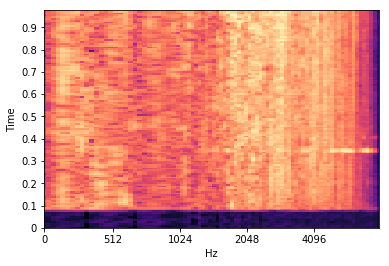

In [38]:
librosa.display.specshow(make_spec('command.wav'), 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

In [18]:
make_spec('yes/bfdb9801_nohash_0.wav').shape

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


(122, 85)

In [111]:
import numpy as np
X_train = make_spec('command(1).wav')

/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [112]:
np.save('data/command.npy', np.expand_dims(X_train, -1)+1.3)

In [101]:
len(classes)

13

In [44]:
def create_sets(file_list = training_list):
    X_array = np.zeros([len(file_list),122,85])
    Y_array = np.zeros([len(file_list)])    
    for ind, file in enumerate(file_list):
        if ind%2000 == 0:
            print(ind, file)
        try:
            X_array[ind] = make_spec(file)
        except ValueError:
            print(ind, file, ValueError)
        Y_array[ind] = all_classes.index(file.rsplit('/')[0])
        
    return X_array, Y_array

In [85]:
X_train, Y_train_all = create_sets() 

0 right/df5457dc_nohash_0.wav


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


2000 eight/9e92ef0c_nohash_0.wav
4000 cat/2cec1d47_nohash_0.wav
6000 learn/ccca5655_nohash_2.wav
8000 happy/87728a88_nohash_0.wav
10000 go/4fd4d073_nohash_1.wav
12000 no/627c0bec_nohash_1.wav
14000 wow/67c7fecb_nohash_0.wav
16000 nine/9190045a_nohash_0.wav
18000 left/f035e2ea_nohash_3.wav
20000 three/e269bac0_nohash_0.wav
22000 sheila/a4ca3afe_nohash_0.wav
24000 one/4cee0c60_nohash_0.wav
26000 zero/d9b8fab2_nohash_2.wav
28000 seven/fac7deca_nohash_2.wav
30000 up/f8ba7c0e_nohash_3.wav
32000 marvin/bfbd0e6b_nohash_2.wav
34000 house/c87a578d_nohash_0.wav
36000 down/fb727898_nohash_1.wav
38000 six/131e738d_nohash_0.wav
40000 yes/52162b51_nohash_3.wav
42000 five/8625475c_nohash_0.wav
44000 forward/de3fe344_nohash_2.wav
46000 off/6f9088d7_nohash_0.wav


In [116]:
new_X_train = []
for i in classes:
    for j in training_list:
        if i == j.rsplit('/')[0]:
            new_X_train.append(j)

In [117]:
len(set(new_X_train))

19802

In [123]:
Xtrain, ytrain = create_sets(file_list=new_X_train)

0 yes/1_min.wav


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


2000 no/21832144_nohash_3.wav
4000 up/e53139ad_nohash_3.wav
6000 down/37dca74f_nohash_1.wav
8000 left/a7216980_nohash_3.wav
10000 right/d070ea86_nohash_4.wav
12000 on/cb2929ce_nohash_0.wav
14000 stop/d3a18257_nohash_0.wav
16000 go/b1f8326d_nohash_1.wav
18000 backward/ec989d6d_nohash_0.wav


In [118]:
new_X_test = []
for i in classes:
    for j in test_list:
        if i == j.rsplit('/')[0]:
            new_X_test.append(j)

In [119]:
len(new_X_test)

13154

In [129]:
Xtest, ytest = create_sets(file_list=new_X_test)

0 yes/578d3efb_nohash_3.wav


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


2000 no/bbc30633_nohash_2.wav
4000 down/1d919a90_nohash_1.wav
6000 right/ed032775_nohash_0.wav
8000 on/863880b7_nohash_1.wav
10000 stop/87070229_nohash_0.wav
12000 backward/94d370bf_nohash_0.wav


In [121]:
new_X_validation = []
for i in classes:
    for j in validation_list:
        if i == j.rsplit('/')[0]:
            new_X_validation.append(j)

In [122]:
len(new_X_validation)

10963

In [130]:
Xval, yval = create_sets(file_list=new_X_validation)

0 yes/1e9e6bdd_nohash_1.wav


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


2000 up/b0f5b16d_nohash_3.wav
4000 left/7257420c_nohash_0.wav
6000 on/8b775397_nohash_0.wav
8000 stop/61ab8fbc_nohash_3.wav
10000 backward/508e30ee_nohash_0.wav


In [131]:
np.save('data/Xtrain.npy', np.expand_dims(Xtest, -1)+1.3)
np.save('data/ytrain.npy', ytest.astype(np.int))
np.save('data/Xtest.npy', np.expand_dims(Xtest, -1)+1.3)
np.save('data/ytest.npy', ytest.astype(np.int))
np.save('data/Xval.npy', np.expand_dims(Xval, -1)+1.3)
np.save('data/yval.npy', yval.astype(np.int))

In [86]:
# all unknown are index 14
Y_train = np.where(Y_train_all < 14, Y_train_all, 14)

In [87]:
print(len(Y_train) == len(Y_train_all), 15 in Y_train)

True False


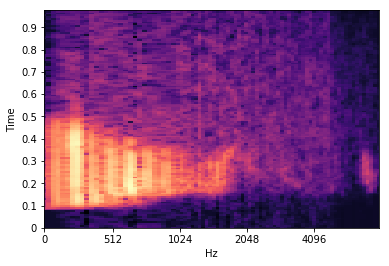

In [51]:
librosa.display.specshow(X_train[6500], 
                         x_axis='mel', 
                         fmax=8000, 
                         y_axis='time', 
                         sr = 16000,
                         hop_length = 128)

In [52]:
print('min: ',np.min(X_train), 
      '\nmax: ', np.max(X_train), 
      '\nmean: ', np.mean(X_train),
      '\nmedian: ', np.median(X_train),
      '\nvariance: ', np.var(X_train))

min:  -2.0306179523468018 
max:  9.682740653715882e-08 
mean:  -1.3648802854978437 
median:  -1.4481196403503418 
variance:  0.20417615399349467


(array([ 1448618.,   162754.,  3909671.,  8783462., 91084448., 23000368.,
        15726461., 15376857., 14010113., 13855192., 13878689., 13963570.,
        14047200., 14066717., 14055032., 13954423., 13808502., 13581339.,
        13296768., 12952956., 12562183., 12108756., 11611203., 11072139.,
        10517903.,  9953102.,  9378158.,  8789339.,  8207469.,  7639348.,
         7090528.,  6587323.,  6126152.,  5702879.,  5321549.,  4978465.,
         4659198.,  4348474.,  4043547.,  3722299.,  3381537.,  3029513.,
         2644029.,  2224802.,  1796707.,  1394138.,  1053500.,   715808.,
          445914.,   207988.]),
 array([-2.03061795e+00, -1.99000559e+00, -1.94939323e+00, -1.90878087e+00,
        -1.86816851e+00, -1.82755615e+00, -1.78694379e+00, -1.74633143e+00,
        -1.70571906e+00, -1.66510670e+00, -1.62449434e+00, -1.58388198e+00,
        -1.54326962e+00, -1.50265726e+00, -1.46204490e+00, -1.42143254e+00,
        -1.38082018e+00, -1.34020782e+00, -1.29959545e+00, -1.25898309e+

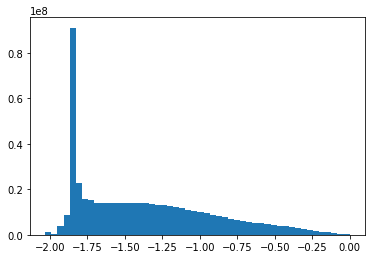

In [53]:
plt.hist(X_train.flatten(), bins = 50)

save the training sets, add channel dimension for keras, normalize around zero.

In [96]:
np.save('data/X.npy',X_train.astype(np.float32))
np.save('data/X_predict.npy',X_test.astype(np.float32))
np.save('data/X_validation.npy',X_val.astype(np.float32))

In [89]:
np.save('data/X_train.npy', np.expand_dims(X_train, -1)+1.3)
np.save('data/Y_train.npy', Y_train.astype(np.int))
np.save('data/Y_train_all.npy', Y_train_all.astype(np.int))

In [90]:
X_val, Y_val_all = create_sets(file_list = validation_list)

0 no/a6d586b7_nohash_1.wav


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


2000 follow/f30285c8_nohash_0.wav
4000 left/439c84f4_nohash_4.wav
6000 right/b69002d4_nohash_1.wav
8000 marvin/745a8e32_nohash_1.wav
10000 marvin/c7aa72e6_nohash_1.wav
12000 wow/3e3b65eb_nohash_0.wav
14000 four/3d794813_nohash_2.wav
16000 sheila/ccfd721c_nohash_0.wav
18000 on/1e9e6bdd_nohash_1.wav
20000 tree/5165cf0a_nohash_0.wav
22000 go/f822b9bf_nohash_3.wav
24000 six/e41a903b_nohash_1.wav
26000 dog/4874a7e9_nohash_1.wav


In [91]:
Y_val = np.where(Y_val_all < 14, Y_val_all, 14)

In [92]:
np.save('data/X_val.npy', np.expand_dims(X_val, -1)+1.3)
np.save('data/Y_val.npy', Y_val.astype(np.int))
np.save('data/Y_val_all.npy', Y_val_all.astype(np.int))

In [93]:
X_test, Y_test_all = create_sets(file_list = test_list)
Y_test = np.where(Y_test_all < 14, Y_test_all, 14)

0 right/d8c314c0_nohash_0.wav


/anaconda3/lib/python3.6/site-packages/librosa/core/spectrum.py:960: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


2000 eight/4b25f620_nohash_0.wav
4000 learn/7fb8d703_nohash_3.wav
6000 go/1bb574f9_nohash_1.wav
8000 no/4fd1443e_nohash_2.wav
10000 nine/35d1b6ee_nohash_2.wav
12000 left/dff327c5_nohash_0.wav
14000 three/0a2b400e_nohash_4.wav
16000 one/3e3fa7fd_nohash_0.wav
18000 zero/a6f2fd71_nohash_4.wav
20000 up/14775481_nohash_0.wav
22000 two/a1c63f25_nohash_0.wav
24000 down/1e02ffc5_nohash_1.wav
26000 yes/363c6bad_nohash_1.wav
28000 five/90e72357_nohash_2.wav
30000 off/ed032775_nohash_3.wav


In [94]:
len(all_files_list), len(training_list), len(validation_list), len(test_list)

(106334, 47960, 26533, 31841)

In [95]:
np.save('data/X_test.npy', np.expand_dims(X_test, -1)+1.3)
np.save('data/Y_test.npy', Y_test.astype(np.int))
np.save('data/Y_test_all.npy', Y_test_all.astype(np.int))